<a href="https://colab.research.google.com/github/IKAR42/Pet_project_2/blob/main/%22Final_pet_project_v5_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Проектная работа 
## На тему: Разработка рекомендательной системы для дейтинг сервиса
### Выполнил : Карайман Игорь

Подключение Google диска 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Загрузка всех необходимых библиотек

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

%matplotlib inline


## 1.Подготовка дата сета

In [ ]:
# Дата сет 1. Пользователь с id_from оценил (rating) пользователя id_to

df_ratings = pd.read_csv('drive/My Drive/rec-libimseti-dir-another.edges', delim_whitespace=True, skiprows=1, names=["id_from", "id_to", "rating"])

In [ ]:
df_ratings.head(5)

,id_from,id_to,rating
0,1,133,8
1,1,720,6
2,1,971,10
3,1,1095,7
4,1,1616,10


In [ ]:
# В датасете данные о пользователе 
# 1ая колонка id
# 2ая колонка gender: "M" - male/мужчина, "F" - female/женщина,  "U" - unknown
# по остальным колонкам недоступна информация

df_info = pd.read_csv('drive/My Drive/info.csv')

In [ ]:
df_info.head()

,id,gender,1,2,3,4,5,6,7,8,9,10,11,12
0,1,F,1,45,90,15,8,13,63,57,96,42,87,0.934487
1,2,F,1,46,81,6,9,31,22,79,82,75,53,0.675761
2,3,U,4,69,64,2,18,44,54,80,50,89,38,0.927339
3,4,F,3,46,90,9,42,54,59,86,60,65,25,0.176650
4,5,F,3,79,83,1,45,57,1,58,34,23,33,0.553003


In [ ]:
# Смотрим базовые статистики по дата сету
print('='*20, ' INFO ', '='*20)
print('\n', '-'*20, '1. Ratings ', '-'*20)
print(df_ratings.info())

print('\n', '-'*20, '1. Ratings ', '-'*20)
print(df_ratings.columns)

print('\n', '-'*20, '1. Ratings ', '-'*20)
print(df_ratings.shape)

print('\n', '-'*20, '1. Ratings ', '-'*20)
print(df_ratings.describe())

print('\n', '-'*55)

print('\n', '-'*20, '2. Users ', '-'*20)
print(df_info.info())

print('\n', '-'*20, '2. Users ', '-'*20)
print(df_info.columns)

print('\n', '-'*20, '2. Users ', '-'*20)
print(df_info.shape)

print('\n', '-'*20, '2. Users ', '-'*20)
print(df_info.describe())

====================  INFO  ====================

 -------------------- 1. Ratings  --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17359346 entries, 0 to 17359345
Data columns (total 3 columns):
 #   Column   Dtype
---  ------   -----
 0   id_from  int64
 1   id_to    int64
 2   rating   int64
dtypes: int64(3)
memory usage: 397.3 MB
None

 -------------------- 1. Ratings  --------------------
Index(['id_from', 'id_to', 'rating'], dtype='object')

 -------------------- 1. Ratings  --------------------
(17359346, 3)

 -------------------- 1. Ratings  --------------------
            id_from         id_to        rating
count  1.735935e+07  1.735935e+07  1.735935e+07
mean   6.787292e+04  1.013644e+05  5.938437e+00
std    3.876211e+04  6.218369e+04  3.112005e+00
min    1.000000e+00  1.000000e+00  1.000000e+00
25%    3.465000e+04  4.813900e+04  3.000000e+00
50%    6.792700e+04  9.731500e+04  6.000000e+00
75%    1.010250e+05  1.513820e+05  9.000000e+00
max    1.353590e

In [ ]:
# Смотрим пропущенные значения
print('='*20, ' MISSING VALUES ', '='*20)
print('\n', '-'*20, '1. Ratings ', '-'*20)
print(df_ratings.isna().sum() )

print('\n', '-'*20, '2. Users ', '-'*20)
print(df_info.isna().sum() )

====================  MISSING VALUES  ====================

 -------------------- 1. Ratings  --------------------
id_from    0
id_to      0
rating     0
dtype: int64

 -------------------- 2. Users  --------------------
id         0
 gender    0
1          0
2          0
3          0
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11         0
12         0
dtype: int64


In [ ]:
# Удаляем дубликаты
df_ratings_new = df_ratings.drop_duplicates()
df_info_new = df_info.drop_duplicates()

In [ ]:
# Проверяем обьем дата сета после удаления дубликатов
# В результате обьем выборки не изменился
print('='*20, ' CHECK DUPLICATES ', '='*20)
print('\n', '-'*20, '1. Ratings ', '-'*20)
print(df_ratings_new.info())

print('\n', '-'*20, '1. Ratings ', '-'*20)
print(df_ratings_new.shape)

print('\n', '-'*55)

print('\n', '-'*20, '2. Users ', '-'*20)
print(df_info_new.info())

print('\n', '-'*20, '2. Users ', '-'*20)
print(df_info_new.shape)


====================  CHECK DUPLICATES  ====================

 -------------------- 1. Ratings  --------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17359346 entries, 0 to 17359345
Data columns (total 3 columns):
 #   Column   Dtype
---  ------   -----
 0   id_from  int64
 1   id_to    int64
 2   rating   int64
dtypes: int64(3)
memory usage: 529.8 MB
None

 -------------------- 1. Ratings  --------------------
(17359346, 3)

 -------------------------------------------------------

 -------------------- 2. Users  --------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 220970 entries, 0 to 220969
Data columns (total 14 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       220970 non-null  int64  
 1    gender  220970 non-null  object 
 2   1        220970 non-null  int64  
 3   2        220970 non-null  int64  
 4   3        220970 non-null  int64  
 5   4        220970 non-null  int64  
 6   5        22097

In [ ]:
df_ratings_new

,id_from,id_to,rating
0,1,133,8
1,1,720,6
2,1,971,10
3,1,1095,7
4,1,1616,10
...,...,...,...
17359341,135359,215145,8
17359342,135359,215718,4
17359343,135359,218646,10
17359344,135359,218857,7


In [ ]:
#Обьединим эти 2 дата сета
df_ratings_new = df_ratings_new.rename(columns={'id_from': 'id'})

In [ ]:
Users_rating = df_ratings_new.merge(df_info_new, on = 'id')
print("\nShape: ", Users_rating.shape )


Shape:  (17359346, 16)


In [ ]:
Users_rating.head()

,id,id_to,rating,gender,1,2,3,4,5,6,7,8,9,10,11,12
0,1,133,8,F,1,45,90,15,8,13,63,57,96,42,87,0.934487
1,1,720,6,F,1,45,90,15,8,13,63,57,96,42,87,0.934487
2,1,971,10,F,1,45,90,15,8,13,63,57,96,42,87,0.934487
3,1,1095,7,F,1,45,90,15,8,13,63,57,96,42,87,0.934487
4,1,1616,10,F,1,45,90,15,8,13,63,57,96,42,87,0.934487


In [ ]:
# Смотрим базовые статистики по дата сету
# Все в норме, столбцы и строки не потерялись
print('='*20, ' INFO ', '='*20)
print('\n', '-'*20, 'Merged_data ', '-'*20)
print(Users_rating.info())

print('\n', '-'*20, 'Merged_data ', '-'*20)
print(Users_rating.columns)

print('\n', '-'*20, 'Merged_data ', '-'*20)
print(Users_rating.shape)

====================  INFO  ====================

 -------------------- Merged_data  --------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17359346 entries, 0 to 17359345
Data columns (total 16 columns):
 #   Column   Dtype  
---  ------   -----  
 0   id       int64  
 1   id_to    int64  
 2   rating   int64  
 3    gender  object 
 4   1        int64  
 5   2        int64  
 6   3        int64  
 7   4        int64  
 8   5        int64  
 9   6        int64  
 10  7        int64  
 11  8        int64  
 12  9        int64  
 13  10       int64  
 14  11       int64  
 15  12       float64
dtypes: float64(1), int64(14), object(1)
memory usage: 2.2+ GB
None

 -------------------- Merged_data  --------------------
Index(['id', 'id_to', 'rating', ' gender', '1', '2', '3', '4', '5', '6', '7',
       '8', '9', '10', '11', '12'],
      dtype='object')

 -------------------- Merged_data  --------------------
(17359346, 16)


In [ ]:
# Удаляем дубликаты
Users_rating_new = Users_rating.drop_duplicates()

In [ ]:
# Проверяем уникальные значения в дата сете
Users_rating_new.nunique()

id         135359
id_to      168791
rating         10
 gender         3
1               5
2              72
3              99
4              24
5              60
6              60
7             100
8             100
9             100
10            100
11            100
12         135359
dtype: int64

----------------------------------- Итоги -----------------------------------

Предварительная подготовка данных окончена:

1. Для работы есть 2 дата сета
2. В дата сете df_ratings
    *   Пользователь с id_from оценил (rating) пользователя id_to
3. В дата сете df_info
    *   1ая колонка id
    *   2ая колонка gender: "M" - male/мужчина, "F" - female/женщина,  "U" - unknown
    *   По остальным колонкам информация недоступна
4. Для решения задачи требуется обьединить эти дата сеты в 1 по столбцу id
5. После обьединения данные утеряны не были. Дубликаты и пустые знаячения не обнаружены





## 2. EDA дата сета

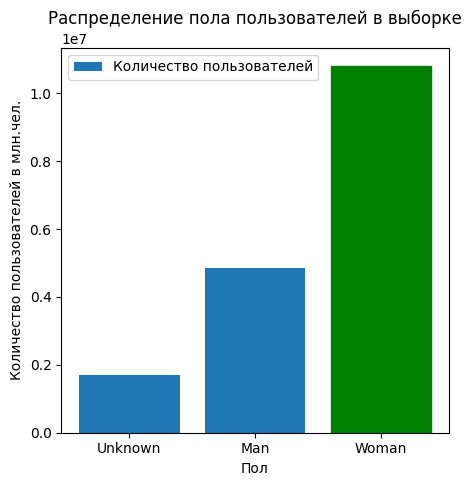

In [ ]:
# Делаем агрегат для визуализации
Users_rating_count = Users_rating_new.groupby(' gender')['rating'].count().sort_values(ascending=True).reset_index()

# Заменим условные значения пола пользователей для лучшей читабельности диаграмм
Users_rating_count.loc[Users_rating_count[" gender"] == "M", " gender"] = 'Man'
Users_rating_count.loc[Users_rating_count[" gender"] == "F", " gender"] = 'Woman'
Users_rating_count.loc[Users_rating_count[" gender"] == "U", " gender"] = 'Unknown'

rcParams['figure.figsize']= 5,5

x = Users_rating_count[' gender']
y = Users_rating_count['rating']

barlist = plt.bar(x, y, label='Количество пользователей')
barlist[2].set_color('g')
plt.xlabel('Пол')
plt.ylabel('Количество пользователей в млн.чел.')
plt.title('Распределение пола пользователей в выборке')
plt.legend()
plt.show()

* Больше всего в выборке женщин
* Пользователи, которые не указали пол при регистрации занимают самую меньшую долю. Далее их сгруппируем с Мужчинами, чтобы слегка уравнять две ключевые группы

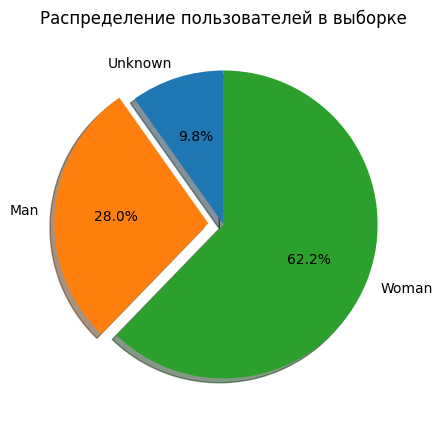

In [ ]:
labels = x
sizes = y

rcParams['figure.figsize']= 5,5

fig1, ax1 = plt.subplots()
explode = (0, 0.1, 0) 
ax1.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Распределение пользователей в выборке')

plt.show()

* заметен сильный дисбаланс целевых групп
* это может говорить о том, что 
  * либо соц сеть востребована женским полом
  * либо пользователи заведомо неверно указывают пол при регистрации
  * либо есть какой то сбой с фичей по указанию пола при регистрации

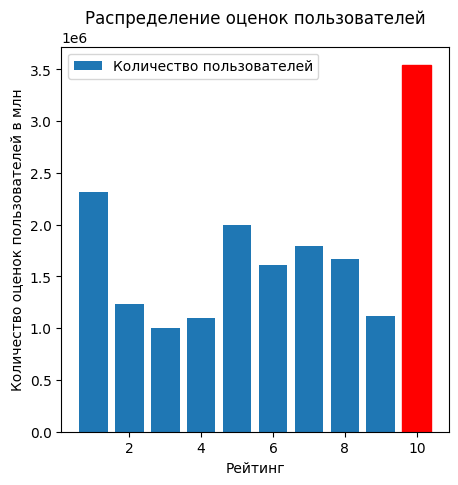

In [ ]:
# Делаем нужный агрегат
Rating_users_count = Users_rating_new.groupby('rating')[' gender'].count().sort_values(ascending=False).reset_index()
Rating_users_count_1 = Rating_users_count.sort_values(by=['rating'])

# Визуализируем
x1 = Rating_users_count_1['rating']
y1 = Rating_users_count_1[' gender']

rcParams['figure.figsize']= 5,5

barlist = plt.bar(x1, y1, label='Количество пользователей')
barlist[9].set_color('r')
plt.xlabel('Рейтинг')
plt.ylabel('Количество оценок пользователей в млн')
plt.title('Распределение оценок пользователей')
plt.legend()
plt.show()

* В предложенной выборке больше всего оценок 10 (максимальных)
* Наименьшим по количеству оценок пользователей является рейтинг 3

<Axes: xlabel='rating'>

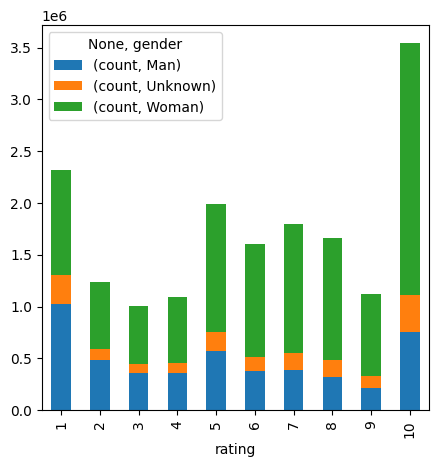

In [ ]:
# Делаем срез данных, добавляем значение 1 для подсчета и меняем его тип на int
Users_rating_2 = Users_rating[[' gender', 'rating']].copy()
Users_rating_2['count'] = '1'
Users_rating_2['count'] = Users_rating_2['count'].astype (str).astype (int)

# Заменим условные значения пола пользователей для лучшей читабельности диаграмм
Users_rating_2.loc[Users_rating_2[" gender"] == "M", " gender"] = 'Man'
Users_rating_2.loc[Users_rating_2[" gender"] == "F", " gender"] = 'Woman'
Users_rating_2.loc[Users_rating_2[" gender"] == "U", " gender"] = 'Unknown'

Users_rating_2.groupby(['rating', ' gender']).agg({'count':sum}).sort_values(['rating', ' gender']).unstack(level=1).plot.bar(stacked=True)

* Больше всего оценку 10 ставят женщины
* Оценка 1 у Женщин и Мужчин практически в одинаковом количестве
* В рейтингах 2 -> 9 (включительно) динамики практически нет при сравнении соотношения оценок целевых классов

In [ ]:
# С помощью этого агрегата мы можем посмотреть в цифрах количество оценок по полу и по рейтингу
Users_rating_2.groupby(['rating', ' gender']).agg({'count':sum}).sort_values(['rating', ' gender'])

count
rating  gender         
1      Man      1022267
       Unknown   285864
       Woman    1007415
2      Man       481142
       Unknown   112482
       Woman     641642
3      Man       357340
       Unknown    88629
       Woman     554408
4      Man       361557
       Unknown    95519
       Woman     638955
5      Man       572898
       Unknown   178147
       Woman    1240583
6      Man       373628
       Unknown   139740
       Woman    1092128
7      Man       391721
       Unknown   162879
       Woman    1238587
8      Man       320315
       Unknown   164394
       Woman    1179348
9      Man       215220
       Unknown   116264
       Woman     785932
10     Man       756370
       Unknown   358927
       Woman    2425045

In [ ]:
#Посмотрим максимальное количество оценок в разрезе каждого ID 
Users_likes_top_1 = Users_rating_new.groupby('id')['rating'].count().sort_values(ascending=False).reset_index().head(5)
Users_likes_top_1

,id,rating
0,90280,25042
1,56792,21599
2,33639,19908
3,61436,18810
4,72351,18443


In [ ]:
#Посмотрим минимальное количество оценок в разрезе каждого ID 
Users_likes_top_2 = Users_rating_new.groupby('id')['rating'].count().sort_values(ascending=True).reset_index().head(5)
Users_likes_top_2

,id,rating
0,98447,20
1,111871,20
2,111866,20
3,82047,20
4,60356,20


#### Делаем срез данных, который потом будет использоваться для построения рекомендаций

* Здесь мы строки с полом U присоединим к полу M (мужчинам)

In [ ]:
# Заменяем значение U на M
Users_rating_new.loc[Users_rating_new[" gender"] == "U", " gender"] = 'M'
Users_rating_new[' gender'].unique()

array(['F', 'M'], dtype=object)

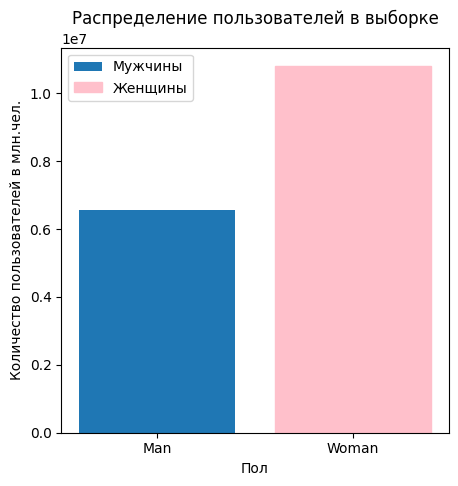

In [ ]:
# Теперь посмотрим как выглядит соотношение мужчин и женщин в выборке
Users_rating_count_2 = Users_rating_new.groupby(' gender')['rating'].count().sort_values(ascending=True).reset_index()

# Заменим условные значения пола пользователей для лучшей читабельности диаграмм
Users_rating_count_2.loc[Users_rating_count_2[" gender"] == "M", " gender"] = 'Man'
Users_rating_count_2.loc[Users_rating_count_2[" gender"] == "F", " gender"] = 'Woman'

# Визуализируем
rcParams['figure.figsize']= 5,5

x = Users_rating_count_2[' gender']
y = Users_rating_count_2['rating']

barlist = plt.bar(x, y, label=['Мужчины', 'Женщины'])
barlist[1].set_color('pink')
plt.xlabel('Пол')
plt.ylabel('Количество пользователей в млн.чел.')
plt.title('Распределение пользователей в выборке')
plt.legend()
plt.show()

#### Построим модель кластеризации и посмотрим статистики

* При этом использовать для построения модели будем использовать исходный дата сет df_info

In [ ]:
# Сделаем срез данных для работы
Users_rating_cluster = df_info.copy()

In [ ]:
# U делаю мужчинами как выше писал и делаю ручным способом label encoder для столбца с полом

Users_rating_cluster.loc[Users_rating_cluster[" gender"] == "M", " gender"] = '1'
Users_rating_cluster.loc[Users_rating_cluster[" gender"] == "F", " gender"] = '2'
Users_rating_cluster.loc[Users_rating_cluster[" gender"] == "U", " gender"] = '1'
Users_rating_cluster.head(5)

,id,gender,1,2,3,4,5,6,7,8,9,10,11,12
0,1,2,1,45,90,15,8,13,63,57,96,42,87,0.934487
1,2,2,1,46,81,6,9,31,22,79,82,75,53,0.675761
2,3,1,4,69,64,2,18,44,54,80,50,89,38,0.927339
3,4,2,3,46,90,9,42,54,59,86,60,65,25,0.176650
4,5,2,3,79,83,1,45,57,1,58,34,23,33,0.553003


In [ ]:
# Чтобы расчеты производились быстрее произведем скейлинг данных
scaler = StandardScaler()
User_rating_scaled = scaler.fit_transform(Users_rating_cluster)

In [ ]:
# Переведем полученный массив данных ndarray в датафрейм pandas
User_rating_scaled_1 = pd.DataFrame(User_rating_scaled)
User_rating_scaled_1.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.732043,1.612735,-1.416341,-0.412583,1.401132,0.503911,-1.243217,-0.955307,0.467311,0.260154,1.617431,-0.259736,1.301032,1.510284
1,-1.732027,1.612735,-1.416341,-0.364383,1.086014,-0.794662,-1.185501,0.082812,-0.953001,1.022325,1.131343,0.882373,0.123300,0.613194


In [ ]:
# рассчитаем оптимальное количество кластеров в диапазоне от 1 до 20
distortion = []
K = range(1, 20) 
# последовательно рассчитываем значения целевой функции по всем объектам
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(User_rating_scaled_1)
    distortion.append(kmeans.inertia_) 

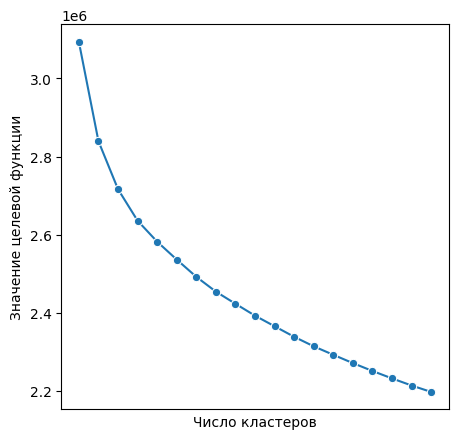

In [ ]:
# строим график изменения целевой функции в зависимости от количества кластеров
# оптимальное число находится в месте, где график максимально "ломается". В нашем примере - это 4.
plt.figure(figsize=(5, 5))
sns.lineplot(
    data=distortion,
    marker="o")

plt.xlabel('Число кластеров')
plt.tick_params(
    axis='x',          
    bottom=False, labelbottom=False)
plt.ylabel('Значение целевой функции');

In [ ]:
# производим кластеризацию с 4 кластерами и переносим для каждой строки исходного датафрейма лейбл кластера
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(User_rating_scaled_1)

Users_rating_cluster['cluster'] = kmeans.labels_

In [ ]:
# Смотрим количественную статистику кластеризации
Users_rating_cluster['cluster'].value_counts()

2    61018
0    54392
3    54195
1    51365
Name: cluster, dtype: int64

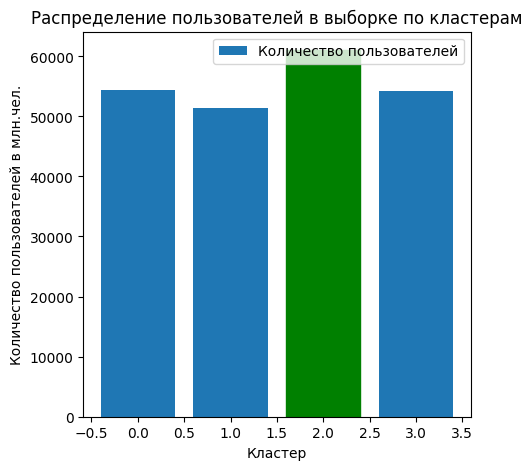

In [ ]:
# Делаем агрегат, чтобы визуально посмотреть количественную разницу между кластерами
Users_clus = Users_rating_cluster.groupby('cluster')['id'].count().sort_values(ascending=True).reset_index()

# Визуализируем
rcParams['figure.figsize']= 5,5

x = Users_clus['cluster']
y = Users_clus['id']

barlist = plt.bar(x, y, label='Количество пользователей')
barlist[3].set_color('g')
plt.xlabel('Кластер')
plt.ylabel('Количество пользователей в млн.чел.')
plt.title('Распределение пользователей в выборке по кластерам')
plt.legend()
plt.show()

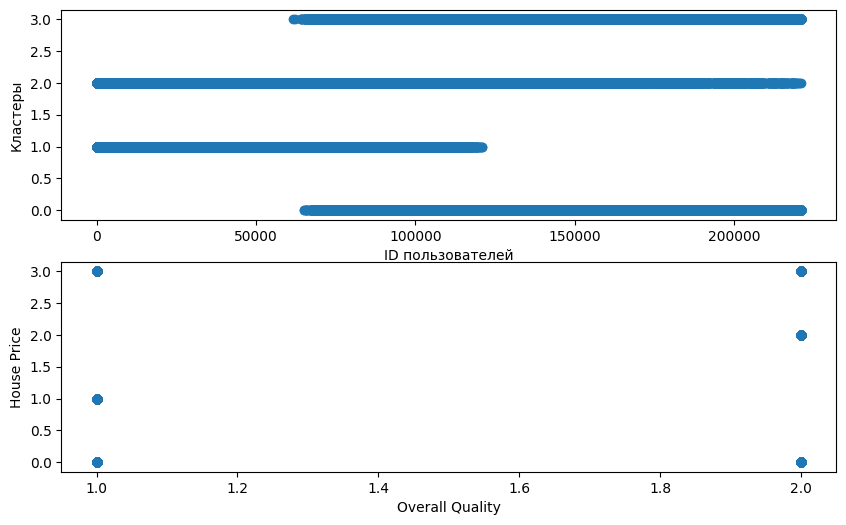

In [ ]:
# Переводим стобец Пол в тип int 
# Визуализируем
# 1. Диаграмма рассеивания для распределения id по кластерам
Users_rating_cluster[' gender'] = Users_rating_cluster[' gender'].astype (str).astype (int)

fig, ax = plt.subplots(2, figsize=(10, 6))
ax[0].scatter(x = Users_rating_cluster['id'], y = Users_rating_cluster['cluster'])
ax[0].set_xlabel("ID пользователей")
ax[0].set_ylabel("Кластеры")

# 2. Диаграмма рассеивания для распределения мужчин и женщин по кластерам (1 - мужчины, 2 - женщины)
ax[1].scatter(x = Users_rating_cluster[' gender'], y = Users_rating_cluster['cluster'])
ax[1].set_xlabel("Overall Quality")
ax[1].set_ylabel("House Price")

plt.show()

* Кластер 0 и 3 не включают в себя id до 60-тысячного id. Это может говорить о том, что в начале пользования платформой не было ряда пользователей со специфическими интересами или характеирстиками
* В определенный период пользователи кластера 1 перестали приходить на платформу (т.к. id это некий счетчик и он фиксирует значения по накоплению)
* В группе мужчин отсутствует кластер - 2
* В группе женщин отсутствует кластер - 1

#### Далее представлены статистики для каждого кластера (средние, перцентили и др.)

In [ ]:
Users_rating_cluster[Users_rating_cluster['cluster'] == 0].describe()

,id,gender,1,2,3,4,5,6,7,8,9,10,11,12,cluster
count,54392.000000,54392.000000,54392.000000,54392.000000,54392.000000,54392.000000,54392.000000,54392.000000,54392.000000,54392.000000,54392.000000,54392.000000,54392.000000,54392.000000,54392.0
mean,163163.191609,1.003015,3.016491,53.836208,49.893881,11.534601,29.435597,29.597974,49.418756,49.334553,49.430725,23.363068,49.573025,0.501553,0.0
std,36355.339998,0.054828,1.409814,20.649433,28.555418,6.947237,17.283556,17.327172,28.840717,28.868914,28.841382,14.443197,28.839188,0.288789,0.0
min,65100.000000,1.000000,1.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000009,0.0
25%,138290.500000,1.000000,2.000000,36.000000,25.000000,5.000000,14.000000,15.000000,24.000000,24.000000,24.000000,11.000000,25.000000,0.251491,0.0
50%,165804.500000,1.000000,3.000000,54.000000,50.000000,12.000000,29.000000,30.000000,49.000000,49.000000,49.000000,23.000000,50.000000,0.502611,0.0
75%,193582.250000,1.000000,4.000000,72.000000,74.000000,18.000000,44.000000,45.000000,74.000000,74.000000,74.000000,36.000000,75.000000,0.751617,0.0
max,220968.000000,2.000000,5.000000,89.000000,99.000000,23.000000,59.000000,59.000000,99.000000,99.000000,99.000000,52.000000,99.000000,0.999970,0.0


In [ ]:
Users_rating_cluster[Users_rating_cluster['cluster'] == 1].describe()

,id,gender,1,2,3,4,5,6,7,8,9,10,11,12,cluster
count,51365.000000,51365.0,51365.000000,51365.000000,51365.000000,51365.000000,51365.000000,51365.000000,51365.000000,51365.000000,51365.000000,51365.000000,51365.000000,51365.000000,51365.0
mean,47528.876784,1.0,3.012908,53.630118,49.983296,11.524092,29.387482,29.558298,49.449294,49.667497,49.250560,49.527441,49.496486,0.496228,1.0
std,28840.057700,0.0,1.416871,20.781977,28.575071,6.931079,17.354209,17.338973,28.803515,28.914622,28.760712,26.725856,28.869302,0.287928,0.0
min,3.000000,1.0,1.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000030,1.0
25%,23124.000000,1.0,2.000000,36.000000,25.000000,6.000000,14.000000,15.000000,24.000000,24.000000,24.000000,28.000000,24.000000,0.246896,1.0
50%,46174.000000,1.0,3.000000,54.000000,50.000000,12.000000,29.000000,30.000000,49.000000,50.000000,49.000000,50.000000,50.000000,0.493225,1.0
75%,69267.000000,1.0,4.000000,72.000000,75.000000,18.000000,45.000000,45.000000,74.000000,75.000000,74.000000,71.000000,75.000000,0.744324,1.0
max,121041.000000,1.0,5.000000,89.000000,99.000000,23.000000,59.000000,59.000000,99.000000,99.000000,99.000000,99.000000,99.000000,0.999993,1.0


In [ ]:
Users_rating_cluster[Users_rating_cluster['cluster'] == 2].describe()

,id,gender,1,2,3,4,5,6,7,8,9,10,11,12,cluster
count,61018.000000,61018.0,61018.000000,61018.000000,61018.000000,61018.000000,61018.000000,61018.000000,61018.000000,61018.000000,61018.000000,61018.000000,61018.000000,61018.000000,61018.0
mean,69720.312432,2.0,3.000147,53.519306,49.942722,11.492969,29.524239,29.630896,49.486922,49.462028,49.448310,49.350946,49.421040,0.498375,2.0
std,41665.528093,0.0,1.413825,20.754974,28.580387,6.927659,17.349438,17.313554,28.911988,28.810836,28.832907,28.738645,28.870736,0.289196,0.0
min,1.000000,2.0,1.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000008,2.0
25%,34376.500000,2.0,2.000000,36.000000,25.000000,5.000000,14.000000,15.000000,25.000000,25.000000,24.000000,25.000000,24.000000,0.245214,2.0
50%,68999.000000,2.0,3.000000,53.000000,50.000000,12.000000,30.000000,30.000000,49.000000,49.000000,49.000000,49.000000,49.000000,0.498702,2.0
75%,103466.250000,2.0,4.000000,71.000000,75.000000,18.000000,45.000000,45.000000,75.000000,74.000000,74.000000,74.000000,74.000000,0.748952,2.0
max,220960.000000,2.0,5.000000,89.000000,99.000000,23.000000,59.000000,59.000000,99.000000,99.000000,99.000000,99.000000,99.000000,0.999988,2.0


In [ ]:
Users_rating_cluster[Users_rating_cluster['cluster'] == 3].describe()

,id,gender,1,2,3,4,5,6,7,8,9,10,11,12,cluster
count,54195.000000,54195.000000,54195.000000,54195.000000,54195.000000,54195.000000,54195.000000,54195.000000,54195.000000,54195.000000,54195.000000,54195.000000,54195.000000,54195.000000,54195.0
mean,163182.836738,1.003377,2.982784,53.261389,50.116284,11.481151,29.806938,29.460485,49.685838,49.512021,49.520675,75.893256,49.276132,0.499412,3.0
std,36490.716023,0.058012,1.415967,20.798641,28.530739,6.917192,17.312938,17.379821,28.902672,28.874732,28.764578,14.336668,28.897082,0.287567,0.0
min,61646.000000,1.000000,1.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,0.000000,0.000014,3.0
25%,138224.500000,1.000000,2.000000,35.000000,26.000000,5.000000,15.000000,14.000000,25.000000,25.000000,25.000000,64.000000,24.000000,0.251687,3.0
50%,166133.000000,1.000000,3.000000,53.000000,50.000000,11.000000,30.000000,30.000000,50.000000,49.000000,50.000000,77.000000,49.000000,0.499581,3.0
75%,193508.500000,1.000000,4.000000,71.000000,75.000000,17.000000,45.000000,44.000000,75.000000,75.000000,74.000000,88.000000,74.000000,0.747598,3.0
max,220970.000000,2.000000,5.000000,89.000000,99.000000,23.000000,59.000000,59.000000,99.000000,99.000000,99.000000,99.000000,99.000000,0.999988,3.0


----------------------------------- Итоги -----------------------------------

Разведочный анализ данных оуончен:
1. Группа пользователей с неопределенных полом отнесена в группу мужчин для того чтобы минимально уравнять целевые группы и сделать рекомендации более релевантными
2. Больше всего в выборке женщин
3. Пользователи, которые не указали пол при регистрации занимают самую меньшую долю. Далее их сгруппируем с Мужчинами, чтобы слегка уравнять две ключевые группы
4. Заметен сильный дисбаланс целевых групп
5. Это может говорить о том, что :
  * либо соц сеть востребована женским полом
  * либо пользователи заведомо неверно указывают пол при регистрации
  * либо есть какой то сбой с фичей по указанию пола при регистрации
6. В предложенной выборке больше всего оценок 10 (максимальных)
7. Наименьшим по количеству оценок пользователей является рейтинг 3
8. Больше всего оценку 10 ставят женщины
9. Оценка 1 у Женщин и Мужчин практически в одинаковом количестве
10. В рейтингах 2 -> 9 (включительно) динамики практически нет при сравнении соотношения оценок целевых классов
11. Максимальное количество лайков - 25042, минимальное - 20
12. Кластер 0 и 3 не включают в себя id до 60-тысячного id. Это может говорить о том, что в начале пользования платформой не было ряда пользователей со специфическими интересами или характеирстиками
13. В определенный период пользователи кластера 1 перестали приходить на платформу (т.к. id это некий счетчик и он фиксирует значения по накоплению)
14. В группе мужчин отсутствует кластер - 2
15. В группе женщин отсутствует кластер - 1

### 3. Реализация модели для расчета рейтинга

В качестве инструмента разработки была выбрана библиотека ALS (mllib от Apache Spark) 


Weighted Matrix Factorization (WMF) & Alternating Least Squares (ALS)

Исходные данные для рекомендательной системы обычно имеют вид крупноформатной
разреженной матрицы А, которая описывает связи пользователей и продуктов. В этой матрице элемент в строке i и столбце j указывает оценку пользователя i продукту j. Для построения
рекомендательной системы в соответствии с алгоритмом ALS матрица А факторизуется. Т.е.


матрица А представляется как произведение двух матриц X и Y. Высота матрицы X соответствует высоте матрицы А (количеству пользователей), высота матрицы Y соответствует ширине матрицы А (количеству объектов). Две остальных размерности матриц X и Y равны одному значению k. Значение k соответствует количеству латентных факторов, которые выявляются при факторизации. Схему такой факторизации иллюстрирует на рисунок 3 [10].


Подобный алгоритм факторизации часто называется алгоритмом заполнения матрицы. Учитывая то, что исходная матрица А, как правило, является
разреженной, произведение X и YT предоставляет
значение для каждого элемента в матрице А.
Таким образом, матрица X может быть интерпретирована как отношение «пользовательфактор», а матрица Y как отношение «факторпродукт» [11-13].


В алгоритме ALS, при вычислении X и Y на основе чередующихся наименьших квадратов, матрица Y инициализируется случайными числами. Алгоритм является итеративным, и на каждой итерации рассчитываются матрицы X и
Y. Чтобы рассчитать строку i матрицы X как функцию от Y и строки i матрицы А, используется выражение:


Данный расчѐт может быть выполнен параллельно для каждой строки матрицы X. Аналогичное (1) выражение используется, чтобы рассчитать подматрицу Yj на основе матрицы Х.
В процессе итераций минимизируется квадратичная ошибка представления матрицы А произведением матриц XYT


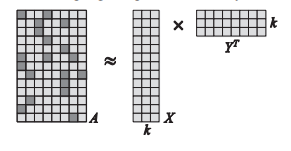



In [ ]:
# Документация по библиотеке

https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.recommendation.ALS.html

In [ ]:
# Импортируем и устанавливаем нужные библиотеки

!pip install pyspark==3.0.1 py4j==0.10.9

from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local[*]")\
        .config("spark.driver.memory", "9g")\
        .appName('PySpark_Tutorial')\
        .getOrCreate()

import pyspark
from pyspark.sql import SQLContext
from pyspark.sql.types import DoubleType, StringType
from pyspark.sql.types import StructType, StructField, IntegerType, FloatType

sc = pyspark.SparkContext.getOrCreate()
sqlContext = SQLContext(sc)

import pandas as pd

spark.conf.set("spark.sql.pivotMaxValues", 1000000)

from google.colab import drive
drive.mount('/content/drive')

In [4]:
# Загружаем с облака сохраненный и предобработанный на предыдущих этапах файл
Users_rating_preproc = pd.read_csv('drive/My Drive/Users_rating_new.csv')

In [5]:
# Продолжаем подготовку данных для реализации основной задачи
# Делаем копию, чтобы не повредить импортированный дата фрейм
Users_rating_pre = Users_rating_preproc.copy()

In [6]:
Users_rating_pre.head(3)

,id,id_to,rating,gender,1,2,3,4,5,6,7,8,9,10,11,12
0,1,133,8,2,1,45,90,15,8,13,63,57,96,42,87,0.934487
1,1,720,6,2,1,45,90,15,8,13,63,57,96,42,87,0.934487
2,1,971,10,2,1,45,90,15,8,13,63,57,96,42,87,0.934487


In [7]:
# удаляем не нужные столбцы
Users_rating_up = Users_rating_pre.drop(['1', '2', '3', '4', '5', '6', '7','8', '9', '10','11','12'], axis = 1)

In [8]:
Users_rating_up.head(3)

,id,id_to,rating,gender
0,1,133,8,2
1,1,720,6,2
2,1,971,10,2


In [9]:
# Формируем список id , для которых по ТЗ нужно найти лучшие пары
list = [98447, 111944, 111930, 82091, 125299, 125298, 17335, 60356]

# Формируем датафрейм с нужными id и 2ой датафрейм с нужным количеством строк
Users_rating_up_2 = Users_rating_up[Users_rating_up.id.isin(list)]
Users_rating_up_3 = Users_rating_up[:600000]

# Обьединяем сэмпла данных в один
Users_rating_up_4 = pd.concat([Users_rating_up_2, Users_rating_up_3])

In [ ]:
Users_rating_up_4

,id,id_to,rating,gender
2180957,17335,23021,6,1
2180958,17335,24497,10,1
2180959,17335,31116,10,1
2180960,17335,37212,8,1
2180961,17335,37885,9,1
...,...,...,...,...
599995,4667,80806,8,2
599996,4667,80869,2,2
599997,4667,80884,5,2
599998,4667,80955,10,2


In [ ]:
# Сохраняем сформированный датафрейм в отдельный файл для последующей загрузки в pyspark
Users_rating_up_4.to_csv("./drive/MyDrive/Users_rating_up_4.csv", index=False)

In [10]:
# Делаем дополнительную предобработку данных датафрейма с инфо о пользователях

df_info_1 = pd.read_csv('drive/My Drive/info.csv')

# Для более удобной интерпритации заменяем условные значения на полное название пола
df_info_1.loc[df_info_1[" gender"] == "M", " gender"] = 'Man'
df_info_1.loc[df_info_1[" gender"] == "F", " gender"] = 'Woman'
df_info_1.loc[df_info_1[" gender"] == "U", " gender"] = 'Man'

# Удаляем кодированные столбцы
df_info = df_info_1.drop(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'], axis = 1)

df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220970 entries, 0 to 220969
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       220970 non-null  int64 
 1    gender  220970 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.4+ MB


In [11]:
# Загружаем файл в Spark датафрейм
df_spark_rating_1 = spark.read.csv("drive/My Drive/Users_rating_up_4.csv", inferSchema='true', nanValue="", header='true', mode='PERMISSIVE')

In [12]:
# Формируем схему и тип данных в столбцах датафрейма
df_spark_rating_1 = df_spark_rating_1 \
    .withColumn('id', df_spark_rating_1['id'].cast('int')) \
    .withColumn('id_to', df_spark_rating_1['id_to'].cast('int')) \
    .withColumn('rating', df_spark_rating_1['rating'].cast('int')) \
    .withColumn(' gender', df_spark_rating_1[' gender'].cast('int')) 

In [13]:
df_spark_rating_1.show(5)

+-----+-----+------+-------+
|   id|id_to|rating| gender|
+-----+-----+------+-------+
|17335|23021|     6|      1|
|17335|24497|    10|      1|
|17335|31116|    10|      1|
|17335|37212|     8|      1|
|17335|37885|     9|      1|
+-----+-----+------+-------+
only showing top 5 rows



In [36]:
df_spark_rating_1.printSchema()

root
 |-- id: integer (nullable = true)
 |-- id_to: integer (nullable = true)
 |-- rating: integer (nullable = true)
 |--  gender: integer (nullable = true)



In [14]:
# Удаляем не нужный для модели столбец
df_spark_rating_2 = df_spark_rating_1.drop(' gender')

In [15]:
# проверяем обновленную схему данных
df_spark_rating_2.printSchema()

root
 |-- id: integer (nullable = true)
 |-- id_to: integer (nullable = true)
 |-- rating: integer (nullable = true)



#### Подберем оптимальные параметры и посчитаем метрику RMSE 
После этого уже обучим модель и применим на тестовом задании

In [81]:
# импортируем библиотеки
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS

In [38]:
# разбиваем дата сет на обучающую и тестовую выборку
(training,test)=df_spark_rating_2.randomSplit([0.8, 0.2])

In [82]:
# обучаем модель
als = ALS (rank = 30, maxIter=15, regParam = 0.09, userCol="id", itemCol="id_to", ratingCol="rating", coldStartStrategy="drop", nonnegative=True)

model = als.fit(training)

In [83]:
# расчитываем RMSE
evaluator=RegressionEvaluator(metricName="rmse",labelCol="rating",predictionCol="prediction")
predictions=model.transform(test)
rmse=evaluator.evaluate(predictions)
print("RMSE="+str(rmse))

RMSE=2.2989937518862633


### Параметры подобраны, обучаем основную модель

In [84]:
# импортируем нужную библиотеку
from pyspark.mllib.recommendation import ALS, MatrixFactorizationModel

In [85]:
# Задаем параметры и обучаем модель
rank = 30 
numIterations = 15 
regParam = 0.09

model = ALS.train(df_spark_rating_2, rank, numIterations, regParam)

In [86]:
display('features for user one', model.userFeatures().first()) 

'features for user one'

(2,
 array('d', [0.8613200187683105, -0.44356390833854675, 0.057739730924367905, -0.16648387908935547, -0.970101535320282, 1.2953318357467651, -0.4315779507160187, -0.03239131346344948, 0.11056627333164215, -0.46780768036842346, 0.17117328941822052, 1.0717265605926514, -0.0072325668297708035, -0.44779089093208313, -0.5016378164291382, -0.6193088889122009, 0.021182911470532417, -0.19183644652366638, 0.034904610365629196, 0.6372418999671936, 0.440227210521698, -0.18151560425758362, -0.14577621221542358, -0.6772007346153259, 0.30230242013931274, 0.7428893446922302, -0.6680210828781128, 0.8385828733444214, -0.4829277992248535, 0.3111223876476288]))

In [87]:
# рекомендуем 10 пользователей с id 1000
userForUser = model.recommendProducts(1000,10)
print('Top 10 Users to recommend for user 100')
display(userForUser)

Top 10 Users to recommend for user 100


[Rating(user=1000, product=23046, rating=10.282608155786194),
 Rating(user=1000, product=171030, rating=9.908888792104984),
 Rating(user=1000, product=212147, rating=9.831005085176187),
 Rating(user=1000, product=193720, rating=9.77585420077056),
 Rating(user=1000, product=124953, rating=9.650997095694352),
 Rating(user=1000, product=141473, rating=9.583910631186491),
 Rating(user=1000, product=73868, rating=9.464823210278988),
 Rating(user=1000, product=86018, rating=9.451889538981186),
 Rating(user=1000, product=54969, rating=9.436789250523962),
 Rating(user=1000, product=195790, rating=9.405079398399488)]

In [88]:
# Переводим полученный результат в датафрейм Pandas

userForStock_1 = pd.DataFrame(userForUser)

# Для последующего merg'a данных переименовываем столбец нового датафрейма с рекомендациями
userForStock_1.rename(columns = {'product':'id'}, inplace = True)

In [89]:
userForStock_1.head(3)

,user,id,rating
0,1000,23046,10.282608
1,1000,171030,9.908889
2,1000,212147,9.831005


In [90]:
# Получаем фрейм данных с рекомендациями
# Важно отметить, что среди рекомендаций не учитывается пол рекомендуемого

df_info[df_info['id'] == 1000]

,id,gender
999,1000,Man


In [91]:
new_df = userForStock_1.merge(df_info, on = 'id')
new_df

,user,id,rating,gender
0,1000,23046,10.282608,Man
1,1000,171030,9.908889,Woman
2,1000,212147,9.831005,Man
3,1000,193720,9.775854,Man
4,1000,124953,9.650997,Woman
5,1000,141473,9.583911,Man
6,1000,73868,9.464823,Woman
7,1000,86018,9.451890,Woman
8,1000,54969,9.436789,Woman
9,1000,195790,9.405079,Man


In [92]:
user_id = 1000

In [96]:
# Напишем простой клссификатор пользователей через цикл for

for i in df_info:
      if df_info.loc[df_info['id'] == user_id, ' gender'].iloc[0] == 'Man':
        new_df = new_df[new_df[' gender'] == 'Woman']
      elif df_info.loc[df_info['id'] == user_id, ' gender'].iloc[0] == 'Woman':
        new_df = new_df[new_df[' gender'] == 'Man']
new_df

,user,id,rating,gender
1,1000,171030,9.908889,Woman
4,1000,124953,9.650997,Woman
6,1000,73868,9.464823,Woman
7,1000,86018,9.451890,Woman
8,1000,54969,9.436789,Woman


#### Всю проделанную работу оборачиваем в класс, чтобы вводя id пользователя находить лучшие пары в 1 строчку кода

In [ ]:
# Важное предусловие - импорт библиотек и датафреймов долежн быть выполнен в ячейках выше

In [97]:
class PeopleMustMatch:
  def __init__(self, table_name_1, table_name_2):
    self.table_name_1 = df_spark_rating_2
    self.table_name_2 = df_info

    print(f'Инициализируем параллельную вселенную')


  def fit(self):
    rank = 30 
    numIterations = 15
    regParam = 0.09 
    self.model = ALS.train(self.table_name_1, rank, numIterations)
    print(f'Купидон начал делать свое дело')

  def recomend(self, id):
    self.id = user_id
    userForUser = self.model.recommendProducts(self.id,50)
    userForStock_1 = pd.DataFrame(userForUser)
    userForStock_1.rename(columns = {'product':'id'}, inplace = True)
    new_df = userForStock_1.merge(df_info, on = 'id')

    print(f'Наш главный герой!')
    df_test = df_info[df_info['id'] == self.id]
    display(df_test)

    print('\n', '-'*40)
    print(f'Для пользователя найдены лучшие из лучших!')

    for i in df_info:
      if df_info.loc[df_info['id'] == user_id, ' gender'].iloc[0] == 'Man':
        new_df = new_df[new_df[' gender'] == 'Woman']
      elif df_info.loc[df_info['id'] == user_id, ' gender'].iloc[0] == 'Woman':
        new_df = new_df[new_df[' gender'] == 'Man']
    display(new_df.head(10))

In [98]:
h = PeopleMustMatch(df_spark_rating_2, df_info)

Инициализируем параллельную вселенную


In [99]:
h.fit()

Купидон начал делать свое дело


In [100]:
user_id = 125299
h.recomend(user_id)

Наш главный герой!


,id,gender
125298,125299,Man



 ----------------------------------------
Для пользователя найдены лучшие из лучших!


,user,id,rating,gender
0,125299,70894,12.001480,Woman
2,125299,101762,11.887162,Woman
3,125299,116372,11.742246,Woman
4,125299,14349,11.657309,Woman
5,125299,15668,11.480432,Woman
6,125299,102751,11.448971,Woman
8,125299,113157,11.286735,Woman
9,125299,81470,11.234706,Woman
11,125299,99626,10.596167,Woman
12,125299,107132,10.589354,Woman


### Теперь с помощью метода класса PeopleMustMatch находим пары для id, которые заданы по ТЗ

In [101]:
list = [98447, 111944, 111930, 82091, 125299, 125298, 17335, 60356]

In [102]:
user_id = 98447
h.recomend(user_id)

Наш главный герой!


,id,gender
98446,98447,Man



 ----------------------------------------
Для пользователя найдены лучшие из лучших!


,user,id,rating,gender
0,98447,75535,14.348994,Woman
1,98447,50895,14.011194,Woman
2,98447,79460,13.994635,Woman
3,98447,29931,13.917820,Woman
4,98447,49622,13.491604,Woman
5,98447,94074,13.324437,Woman
6,98447,73240,13.278732,Woman
7,98447,95502,13.206868,Woman
8,98447,71636,13.185494,Woman
10,98447,111908,13.065811,Woman


In [103]:
user_id = 111944
h.recomend(user_id)

Наш главный герой!


,id,gender
111943,111944,Man



 ----------------------------------------
Для пользователя найдены лучшие из лучших!


,user,id,rating,gender
1,111944,120031,13.887182,Woman
3,111944,50728,13.593319,Woman
4,111944,30166,13.416208,Woman
7,111944,50895,13.147310,Woman
8,111944,125535,13.078976,Woman
9,111944,45031,12.867406,Woman
10,111944,34439,12.711197,Woman
11,111944,118636,12.697830,Woman
12,111944,106958,12.563118,Woman
13,111944,5976,12.480586,Woman


In [104]:
user_id = 111930
h.recomend(user_id)

Наш главный герой!


,id,gender
111929,111930,Man



 ----------------------------------------
Для пользователя найдены лучшие из лучших!


,user,id,rating,gender
1,111930,74012,13.472884,Woman
2,111930,52386,13.110877,Woman
4,111930,6083,13.092598,Woman
5,111930,86025,13.066279,Woman
8,111930,120048,12.766114,Woman
10,111930,39012,12.610753,Woman
11,111930,16221,12.598293,Woman
12,111930,106458,12.515760,Woman
13,111930,80136,12.449934,Woman
14,111930,75852,12.354582,Woman


In [105]:
user_id = 82091
h.recomend(user_id)

Наш главный герой!


,id,gender
82090,82091,Man



 ----------------------------------------
Для пользователя найдены лучшие из лучших!


,user,id,rating,gender
1,82091,52724,14.430121,Woman
3,82091,89052,14.381805,Woman
4,82091,9670,14.315286,Woman
6,82091,29306,13.615935,Woman
7,82091,85438,13.522550,Woman
8,82091,97138,13.237916,Woman
9,82091,12529,13.105470,Woman
11,82091,102759,12.899051,Woman
14,82091,113157,12.865753,Woman
15,82091,5018,12.824528,Woman


In [106]:
user_id = 125299
h.recomend(user_id)

Наш главный герой!


,id,gender
125298,125299,Man



 ----------------------------------------
Для пользователя найдены лучшие из лучших!


,user,id,rating,gender
0,125299,70894,12.001480,Woman
2,125299,101762,11.887162,Woman
3,125299,116372,11.742246,Woman
4,125299,14349,11.657309,Woman
5,125299,15668,11.480432,Woman
6,125299,102751,11.448971,Woman
8,125299,113157,11.286735,Woman
9,125299,81470,11.234706,Woman
11,125299,99626,10.596167,Woman
12,125299,107132,10.589354,Woman


In [107]:
user_id = 125298
h.recomend(user_id)

Наш главный герой!


,id,gender
125297,125298,Man



 ----------------------------------------
Для пользователя найдены лучшие из лучших!


,user,id,rating,gender
1,125298,88283,12.901258,Woman
3,125298,89572,12.491160,Woman
4,125298,86071,12.378681,Woman
6,125298,127980,12.303583,Woman
7,125298,40162,11.882058,Woman
8,125298,76558,11.879547,Woman
9,125298,117425,11.784552,Woman
10,125298,113922,11.744124,Woman
11,125298,84934,11.647918,Woman
13,125298,36312,11.346894,Woman


In [108]:
user_id = 17335
h.recomend(user_id)

Наш главный герой!


,id,gender
17334,17335,Man



 ----------------------------------------
Для пользователя найдены лучшие из лучших!


,user,id,rating,gender
0,17335,25291,20.275765,Woman
2,17335,40941,18.126120,Woman
4,17335,111465,17.986965,Woman
10,17335,63251,16.722324,Woman
12,17335,134723,16.426757,Woman
15,17335,66444,16.278849,Woman
19,17335,71177,16.104631,Woman
20,17335,126885,16.085504,Woman
22,17335,110212,16.023759,Woman
35,17335,134347,15.540012,Woman


In [109]:
user_id = 60356
h.recomend(user_id)

Наш главный герой!


,id,gender
60355,60356,Man



 ----------------------------------------
Для пользователя найдены лучшие из лучших!


,user,id,rating,gender
1,60356,36548,14.504825,Woman
3,60356,122318,13.952161,Woman
4,60356,85916,13.777791,Woman
5,60356,39288,13.709391,Woman
8,60356,52701,13.443767,Woman
11,60356,36608,13.335176,Woman
13,60356,80098,13.161033,Woman
15,60356,11242,12.971707,Woman
17,60356,37262,12.922343,Woman
22,60356,38698,12.499978,Woman


In [110]:
# Все id по ТЗ мужского пола. Ниже проверяем модель с id женского пола
user_id = 25
h.recomend(user_id)

Наш главный герой!


,id,gender
24,25,Woman



 ----------------------------------------
Для пользователя найдены лучшие из лучших!


,user,id,rating,gender
1,25,19489,13.627591,Man
2,25,63996,13.513892,Man
3,25,131432,13.261568,Man
5,25,18204,13.214049,Man
6,25,41224,12.845147,Man
8,25,18725,12.709455,Man
10,25,66521,12.615188,Man
11,25,64390,12.571647,Man
12,25,53837,12.446558,Man
13,25,18685,12.360936,Man


----------------------------------- Итоги -----------------------------------

В результате работ:
1. Разработана модель CF, которая на основании id пользователя, id выбираемого и рейтинга рассчитывает общий рейтинг по датафрейму и предлагает новые возможные пары пользователей
2. Модель работает как для id с мужским полом, так и id с женским полом
3. За метрику качества взята RMSE = 2.29. Над метрикой можно работать. В рамках проекта разработано mvp